In [327]:
listings = pd.read_csv('listings2.csv')
calendar = pd.read_csv('calendar.csv')

In [369]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [329]:
listings.head()

,listing_id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_acceptance_rate,...,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,17%,...,63,338,48,0,0,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,69%,...,18,194,409,32,0,f,1,1,0,0
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",100%,...,90,365,50,0,0,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",25%,...,12,123,2,1,0,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,100%,...,34,192,507,33,2,f,1,0,1,0


In [330]:
listings.shape 

(38277, 50)

In [331]:
listings.isnull().sum()

listing_id                                          0
name                                               13
description                                      1192
neighborhood_overview                           15627
host_id                                             0
host_name                                          34
host_since                                         34
host_location                                     137
host_about                                      16149
host_acceptance_rate                            16486
host_is_superhost                                  34
host_neighbourhood                               7464
host_listings_count                                34
host_total_listings_count                          34
host_verifications                                  0
host_has_profile_pic                               34
host_identity_verified                             34
neighbourhood_cleansed                              0
neighbourhood_group_cleansed

In [332]:
listings2 = listings.drop(['description','neighborhood_overview','host_name','host_about',\
               'host_acceptance_rate','host_is_superhost','host_verifications', 'host_has_profile_pic',\
                'host_identity_verified',\
               'number_of_reviews_ltm','number_of_reviews_l30d'], axis=1)


In [333]:
listings2.shape

(38277, 39)

In [334]:
listings2.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [335]:
len(set(listings2['listing_id'])) 

# 38,277 unique airbnb listings for this dataset 

38277

In [386]:
listings2021 = listings2
listings2021.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [337]:
listings2019 = pd.read_csv('NYC_2019.csv')
listings2017 = pd.read_csv('NYC_2017-10.csv')
listings2016 = pd.read_csv('NYC_2016-01.csv')
listings2015 = pd.read_csv('NYC_2015-08.csv')
listings2014 = pd.read_csv('NYC_2014-08.csv')

In [383]:
listings2019.head()

,listing_id,name,host_listing_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [339]:
listings2019.shape

(48895, 16)

In [380]:
listings2017.head()

,listing_id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
0,18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN


In [341]:
listings2017.shape

(44317, 31)

In [377]:
listings2016.head()

,listing_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,105,500.0,Private room,Manhattan,Hell's Kitchen,39,5.0,NaN,1.0,1.0,549.0,1.0,40.762099,-73.996022,2016-01-22 01:32:16.039626
1,2515,2758.0,Private room,Manhattan,Harlem,125,4.5,2.0,1.0,2.0,59.0,2.0,40.799205,-73.953676,2016-01-21 16:14:58.025230
2,2539,2787.0,Private room,Brooklyn,Kensington,1,5.0,2.0,1.0,1.0,39.0,1.0,40.647486,-73.972370,2016-01-21 17:48:59.403956
3,2595,2845.0,Entire home/apt,Manhattan,Midtown,19,5.0,2.0,0.0,1.0,225.0,1.0,40.753621,-73.983774,2016-01-23 16:09:37.688387
4,3330,4177.0,Private room,Brooklyn,Williamsburg,19,5.0,2.0,1.0,1.0,90.0,3.0,40.708558,-73.942362,2016-01-22 20:20:20.978411


In [350]:
listings2016.shape[0]

36003

In [373]:
listings2015.head()

,listing_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,105,500,Private room,Manhattan,Hell's Kitchen,39,5.0,NaN,1.0,1.0,549.0,1.0,40.762099,-73.996022,2015-08-10 21:44:27.340600
1,2515,2758,Private room,Manhattan,Harlem,117,4.5,2.0,1.0,2.0,59.0,2.0,40.799205,-73.953676,2015-08-10 21:44:27.340600
2,2595,2845,Entire home/apt,Manhattan,Midtown,17,5.0,2.0,0.0,1.0,285.0,1.0,40.753621,-73.983774,2015-08-10 21:44:27.340600
3,3330,4177,Private room,Brooklyn,Williamsburg,16,4.5,2.0,1.0,1.0,125.0,3.0,40.708558,-73.942362,2015-08-10 21:44:27.340600
4,3831,4869,Private room,Brooklyn,Clinton Hill,8,4.5,3.0,1.0,1.0,80.0,1.0,40.685138,-73.959757,2015-08-10 21:44:27.340600


In [389]:
listings2014.head()

,listing_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,105,500,Private room,Manhattan,Hell's Kitchen,39,5.0,7,1.0,1.0,167.0,1,40.762099,-73.996022,2014-08-31 22:55:08.354
1,2515,2758,Private room,Manhattan,Harlem,102,4.5,2,1.0,2.0,66.0,2,40.799205,-73.953676,2014-09-01 02:40:26.770
2,2684,2965,Private room,Manhattan,Upper West Side,0,NaN,2,1.0,1.5,134.0,1,40.792353,-73.967807,2014-08-31 23:37:21.967
3,2993,3352,Entire home/apt,Manhattan,Lower East Side,2,4.5,2,1.0,1.0,168.0,5,40.723593,-73.991188,2014-09-01 18:06:43.285
4,3330,4177,Private room,Brooklyn,Williamsburg,9,5.0,2,1.0,1.0,140.0,3,40.708558,-73.942362,2014-08-31 14:16:24.363


In [372]:
listings2015.columns = listings2015.columns.str.replace('room_id', 'listing_id')

In [388]:
listings2014.columns = listings2014.columns.str.replace('room_id', 'listing_id')

In [375]:
listings2016.columns = listings2016.columns.str.replace('room_id', 'listing_id')

In [382]:
listings2017.columns = listings2017.columns.str.replace('listing_listing_id', 'listing_id')
listings2019.columns = listings2019.columns.str.replace('listing_listing_listing_id', 'listing_id')

In [390]:
print(len(set(listings2014['listing_id'])))
print(len(set(listings2015['listing_id'])))
print(len(set(listings2016['listing_id'])))
print(len(set(listings2017['listing_id'])))
print(len(set(listings2019['listing_id'])))
print(len(set(listings2021['listing_id'])))


20777
30001
36003
44317
48895
38277


In [358]:
tot_2014 = listings2014.shape[0]
tot_2015 = listings2015.shape[0]
tot_2016 = listings2016.shape[0]
tot_2017 = listings2017.shape[0]
tot_2019 = listings2019.shape[0]
tot_2021 = listings2021.shape[0]

print(tot_2014)
print(tot_2015)
print(tot_2016)
print(tot_2017)
print(tot_2019)
print(tot_2021)

# unique values in each dataset 

20777
30001
36003
44317
48895
38277


In [359]:
tot_listings = [1092, 2362, 5628, 10391,tot_2014,tot_2015,tot_2016,tot_2017,52000, tot_2019,36923,tot_2021]
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

def list_todict(list1, list2):
    dict = {}
    dict['year'] = list1
    dict['tot_listings'] = list2
    return dict 
 
listings_over_time = pd.DataFrame(list_todict(year, tot_listings))
listings_over_time.columns = ['Year', 'Active Listings']
listings_over_time 

# source: https://comptroller.nyc.gov/reports/the-impact-of-airbnb-on-nyc-rents/

,Year,Active Listings
0,2010,1092
1,2011,2362
2,2012,5628
3,2013,10391
4,2014,20777
5,2015,30001
6,2016,36003
7,2017,44317
8,2018,52000
9,2019,48895


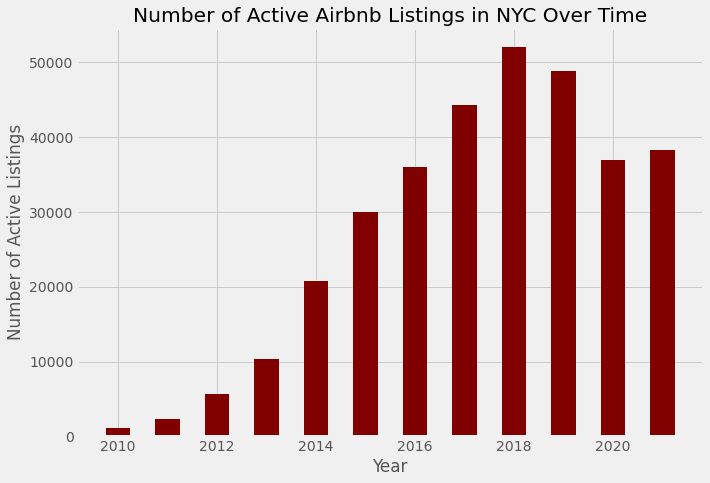

In [516]:
fig, ax = plt.subplots(figsize=(10,7))
num_listings = listings_over_time['Active Listings']
year = listings_over_time['Year']
plt.bar(year, num_listings, color = 'maroon', width=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Active Listings")
ax.set_title('Number of Active Airbnb Listings in NYC Over Time')

plt.show()

In [360]:
listings2021.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [362]:
listings2021

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0
5,5203,Cozy Clean Guest Room - Family Apt,7490,2009-02-05,"New York, New York, United States",Upper West Side,1.0,1.0,Upper West Side,Manhattan,...,0,0,0,0,118,f,1,0,1,0
6,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,2009-03-10,"New York, New York, United States",Park Slope,3.0,3.0,South Slope,Brooklyn,...,2,17,47,322,204,f,3,1,2,0
7,6848,Only 2 stops to Manhattan studio,15991,2009-05-06,"New York, New York, United States",Williamsburg,1.0,1.0,Williamsburg,Brooklyn,...,2,30,30,179,181,t,1,1,0,0
8,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,2009-05-07,"New York, New York, United States",East Harlem,0.0,0.0,East Harlem,Manhattan,...,30,60,90,365,0,f,2,0,2,0
9,6990,UES Beautiful Blue Room,16800,2009-05-12,"New York, New York, United States",East Harlem,3.0,3.0,East Harlem,Manhattan,...,1,4,34,309,234,t,1,0,1,0


In [392]:
listings2021 = listings2021.rename(columns = {"neighbourhood_group_cleansed": "area", \
                               "neighbourhood_cleansed":"neighbourhood"})
listings2021.head()

,listing_id,name,host_id,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,area,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,Skylit Midtown Castle,2845,2008-09-09,"New York, New York, United States",Midtown,8.0,8.0,Midtown,Manhattan,...,3,33,63,338,48,f,3,3,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,2008-12-07,"New York, New York, United States",Clinton Hill,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,3,6,18,194,409,f,1,1,0,0
2,5121,BlissArtsSpace!,7356,2009-02-03,"New York, New York, United States",Bedford-Stuyvesant,1.0,1.0,Bedford-Stuyvesant,Brooklyn,...,30,60,90,365,50,f,2,0,2,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,2009-02-03,"Brooklyn, New York, United States",Greenwood Heights,1.0,1.0,Sunset Park,Brooklyn,...,3,3,12,123,2,f,1,1,0,0
4,5178,Large Furnished Room Near B'way,8967,2009-03-03,"New York, New York, United States",Hell's Kitchen,1.0,1.0,Midtown,Manhattan,...,1,16,34,192,507,f,1,0,1,0


In [432]:
neighbourhood = listings2021.groupby('neighbourhood')[['listing_id']].count()
neighbourhood = neighbourhood.sort_values('listing_id', ascending=False)
top_25_nbhd = neighbourhood.iloc[1:26,:]
top_25_stats = top_25_nbhd.agg(['mean','std','max','min','sum'])
top_25_stats

,listing_id
mean,948.320000
std,612.141168
max,2603.000000
min,381.000000
sum,23708.000000


In [365]:
top_25_nbhd

,listing_id
neighbourhood,
Williamsburg,2603
Harlem,1971
Hell's Kitchen,1702
Bushwick,1693
Midtown,1635
Upper West Side,1538
Upper East Side,1362
Crown Heights,1225
East Village,1167


In [366]:
top_10_nbhd = neighbourhood.iloc[1:11,:]
top_10_nbhd

,listing_id
neighbourhood,
Williamsburg,2603
Harlem,1971
Hell's Kitchen,1702
Bushwick,1693
Midtown,1635
Upper West Side,1538
Upper East Side,1362
Crown Heights,1225
East Village,1167


In [443]:
areas = listings2021.groupby('area')[['listing_id']].count()
areas

,listing_id
area,
Bronx,1104
Brooklyn,14716
Manhattan,16781
Queens,5323
Staten Island,353


In [454]:
areas['sum'] = 38277
areas['proportion'] = round((areas['listing_id']/areas['sum'])*100,2)
areas

areas_perc = areas[['listing_id','proportion']]
areas_perc

,listing_id,proportion
area,,
Bronx,1104,2.88
Brooklyn,14716,38.45
Manhattan,16781,43.84
Queens,5323,13.91
Staten Island,353,0.92


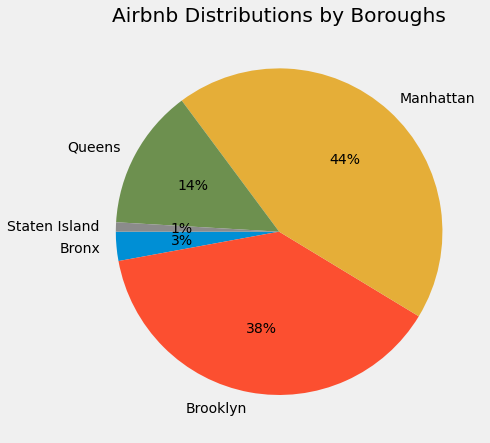

In [491]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Airbnb Distributions by Boroughs")
labels = 'Bronx','Brooklyn','Manhattan','Queens','Staten Island'
g = plt.pie(areas.proportion, labels=labels, autopct='%1.0f%%', startangle=180)
plt.show()

In [367]:
listings2021.groupby('room_type')[['listing_id']].count()
tot_2021 

38277

In [368]:
listings2021['bathrooms_text'].value_counts()

1 bath               19697
1 shared bath         9497
1 private bath        2758
2 baths               2201
2 shared baths        1128
1.5 baths             1039
1.5 shared baths       713
2.5 baths              307
3 baths                185
0 shared baths         142
2.5 shared baths        98
3 shared baths          94
3.5 baths               79
4 baths                 58
0 baths                 43
Half-bath               40
4.5 baths               21
Shared half-bath        15
4 shared baths          11
5 baths                 11
Private half-bath       11
5.5 baths                5
6 baths                  5
8 baths                  3
3.5 shared baths         2
7.5 baths                2
6 shared baths           2
4.5 shared baths         1
6.5 baths                1
7 baths                  1
Name: bathrooms_text, dtype: int64